## Steps of the Projects

**Data Cleaning**<br>
**EDA**<br>
**Text Preprocessing**<br>
**Model Building**<br>
**Evalutaion**<br>
**Improvement**<br>
**Website**<br>
**Deployment**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [2]:
df = pd.read_csv(r"C:\Users\ammar\Downloads\spam.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.size

27860

In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
## Deleting the last 3 column as they are no use

df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"] ,axis = 1, inplace = True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns ={"v1": "Target","v2" : "Text"}, inplace = True)

In [10]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
## We transform our target column into numerical column

df['Target'] = le.fit_transform(df['Target'])

In [13]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
## Checking for null value. as there is not null value so we can move forward

df.isnull().sum()

Target    0
Text      0
dtype: int64

In [15]:
## Checking a duplicate value. as you cna see there is 403 duplicate value so we have o deal with it

df.duplicated().sum()

np.int64(403)

In [16]:
df = df.drop_duplicates(keep="first")

In [17]:
df.shape

(5169, 2)

In [18]:
df.duplicated().sum()

np.int64(0)

## EDA (Exploratary Data Analysis)

**0 = "Ham" 1 = "Spam"**

In [19]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

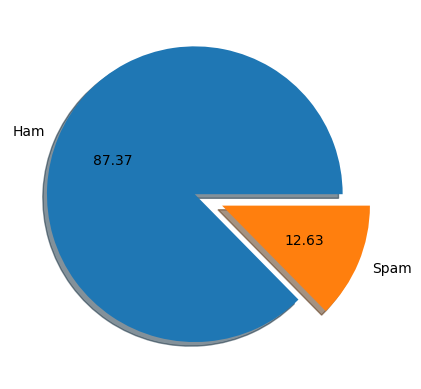

In [20]:
plt.pie(df["Target"].value_counts(),labels=["Ham","Spam"],autopct="%0.2f",shadow=True, explode=[0,0.2])
plt.show()

**Dataset is inbalance**

In [21]:
import nltk

In [22]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to c:\Users\ammar\OneDrive\Deskt
[nltk_data]     op\Expirement\experiment\share\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to c:\Users\ammar\OneDrive\D
[nltk_data]     esktop\Expirement\experiment\share\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
df["Num_Char"] = df["Text"].apply(len)

In [25]:
df["num_word"]= df["Text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df["num_sentence"]= df["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))


In [27]:
df.head()

,Target,Text,Num_Char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[["Num_Char","num_word","num_sentence"]].describe()

,Num_Char,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df["Target"] == 0][["Num_Char","num_word","num_sentence"]].describe()

,Num_Char,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df["Target"] == 1][["Num_Char","num_word","num_sentence"]].describe()

,Num_Char,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


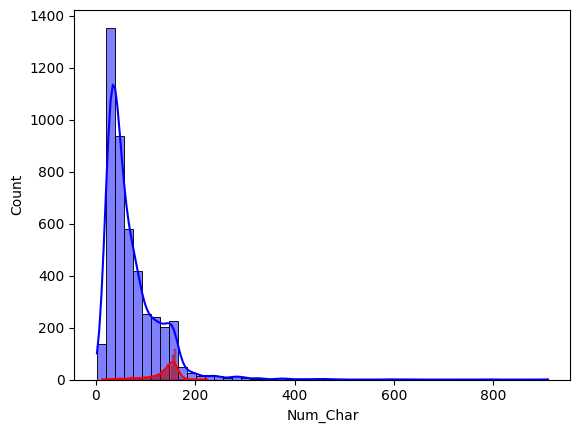

In [31]:
sns.histplot(df[df["Target"]==0]["Num_Char"],bins= 50,kde=True,color="blue")
sns.histplot(df[df["Target"]==1]["Num_Char"],bins= 50,kde=True,color="red")
plt.show()

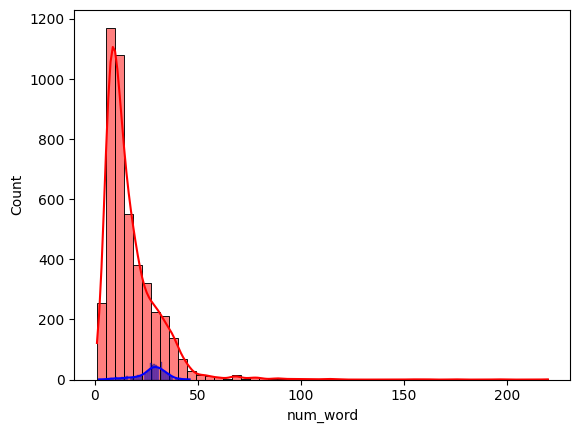

In [32]:
sns.histplot(df[df["Target"]==0]["num_word"],bins= 50,kde=True,color="red")
sns.histplot(df[df["Target"]==1]["num_word"],bins= 50,kde=True,color="blue")
plt.show()

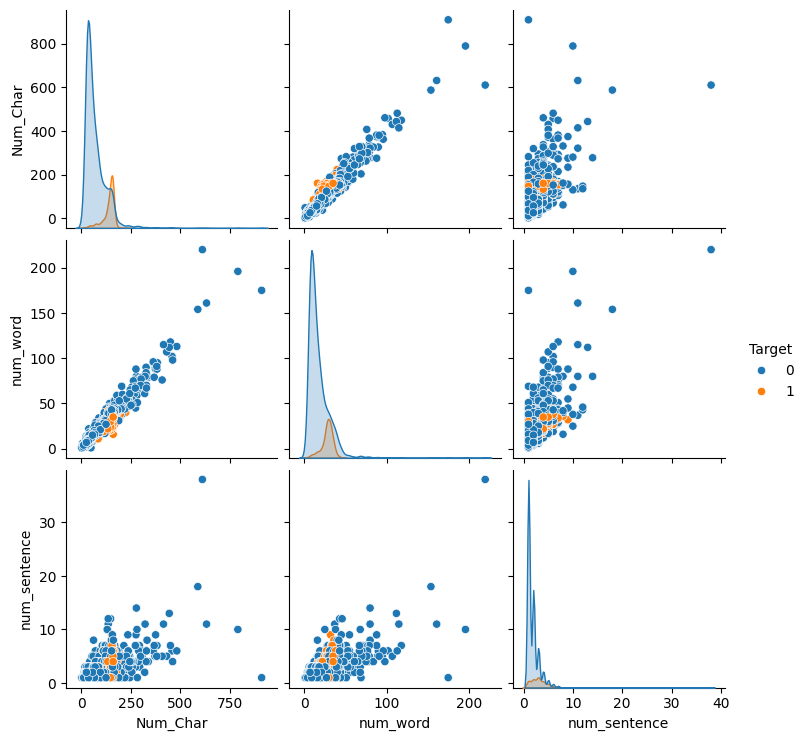

In [33]:
sns.pairplot(df, hue= "Target")

<Axes: >

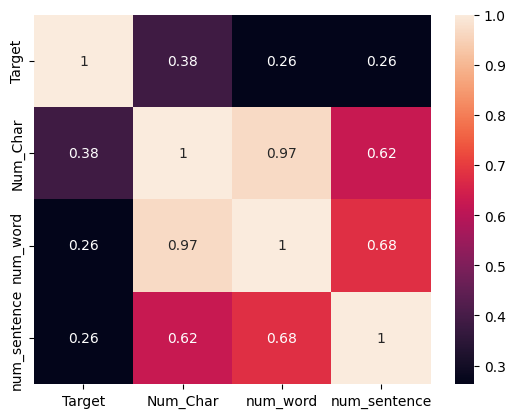

In [34]:
sns.heatmap(df[["Target","Num_Char","num_word","num_sentence"]].corr(),annot=True)

## Data Preprocessing

In [35]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [36]:
ps = PorterStemmer()

In [37]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to c:\Users\ammar\OneDrive\D
[nltk_data]     esktop\Expirement\experiment\share\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
def cleaning(context):
    stemming = re.sub("[^a-zA-Z]"," ",context)
    stemming = stemming.lower()
    stemming = nltk.word_tokenize(stemming)
    stemming = [ps.stem(word) for word in stemming if not  word in stopwords.words("english")]
    stemming = " ".join(stemming)
    return stemming

In [39]:
df['Transformed_text'] = df["Text"].apply(cleaning)

In [40]:
df.head()

,Target,Text,Num_Char,num_word,num_sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
df.columns

Index(['Target', 'Text', 'Num_Char', 'num_word', 'num_sentence',
       'Transformed_text'],
      dtype='object')

In [42]:
from wordcloud import WordCloud

In [43]:
wb = WordCloud(width = 500, height = 500 , background_color = "white",min_font_size =10)


In [44]:
spam_wb = wb.generate(df[df["Target"]==1]["Transformed_text"].str.cat(sep=" "))

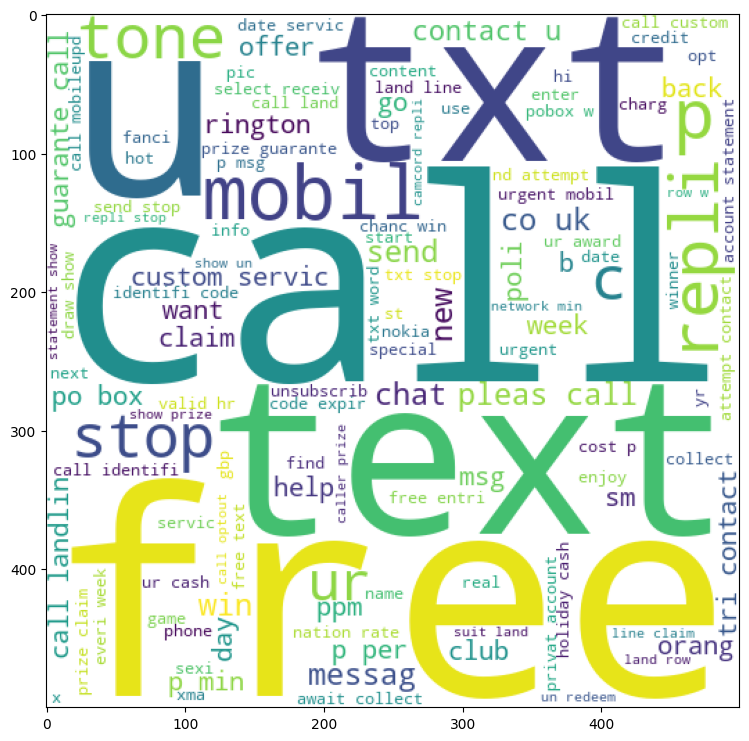

In [45]:
plt.figure(figsize=(15,9))
plt.imshow(spam_wb)

In [46]:
Ham_wb = wb.generate(df[df["Target"]==0]["Transformed_text"].str.cat(sep=" "))

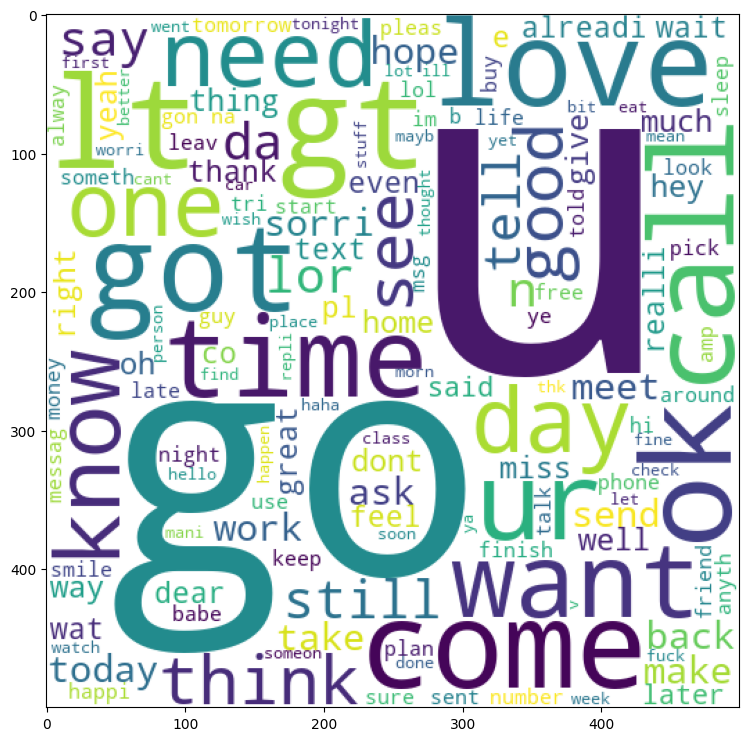

In [47]:
plt.figure(figsize=(15,9))
plt.imshow(Ham_wb)


In [48]:
spam_corpus = []

for message in df[df["Target"] == 1]["Transformed_text"].tolist():
    for word in message.split():
        spam_corpus.append(word)

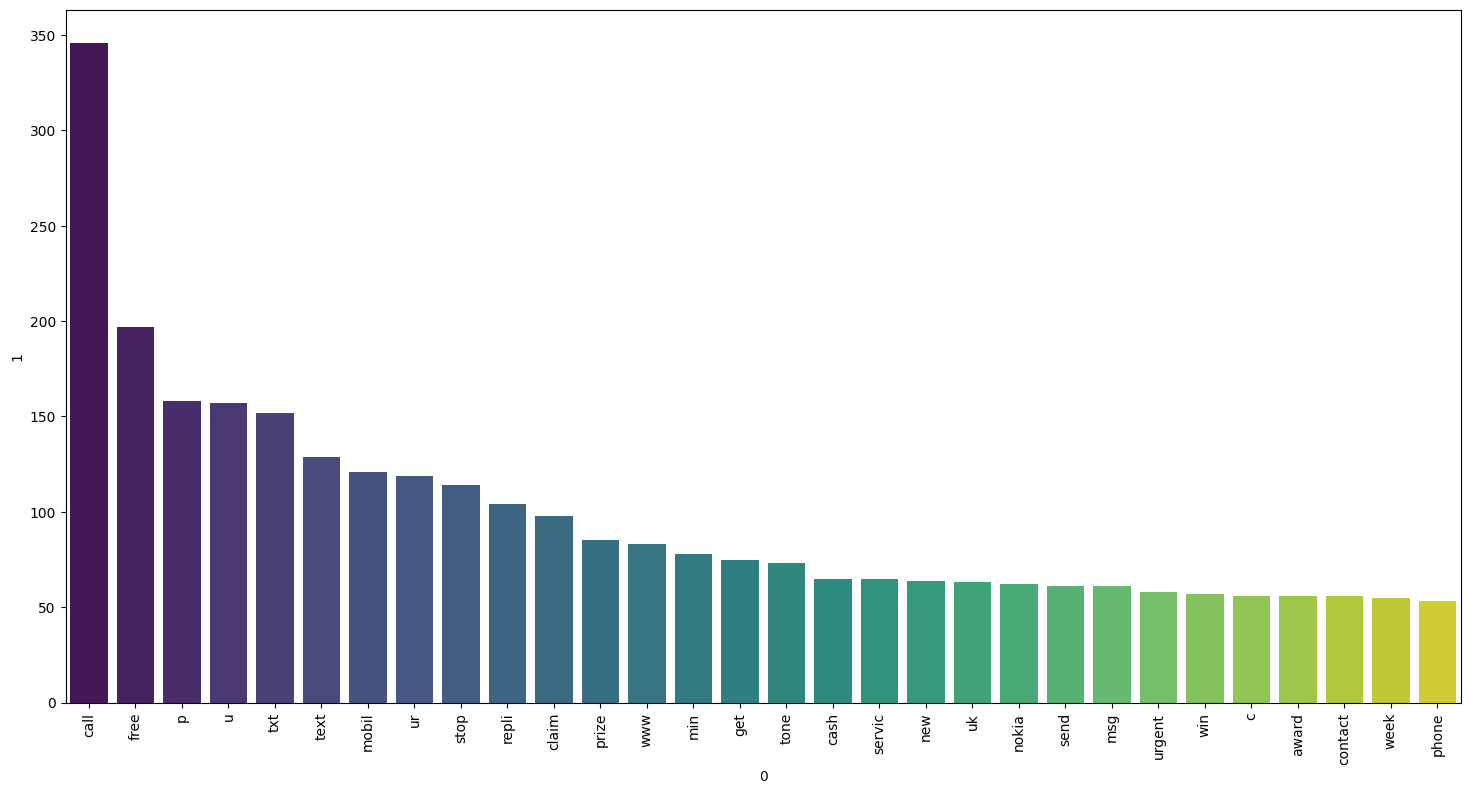

In [49]:
from collections import Counter
plt.figure(figsize=(18,9))
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1],hue= pd.DataFrame(Counter(spam_corpus).most_common(30))[0],palette="viridis")
plt.xticks(rotation = "vertical")
plt.show()

In [50]:
Ham_corpus = []

for message in df[df["Target"] == 0]["Transformed_text"].tolist():
    for word in message.split():
        Ham_corpus.append(word)

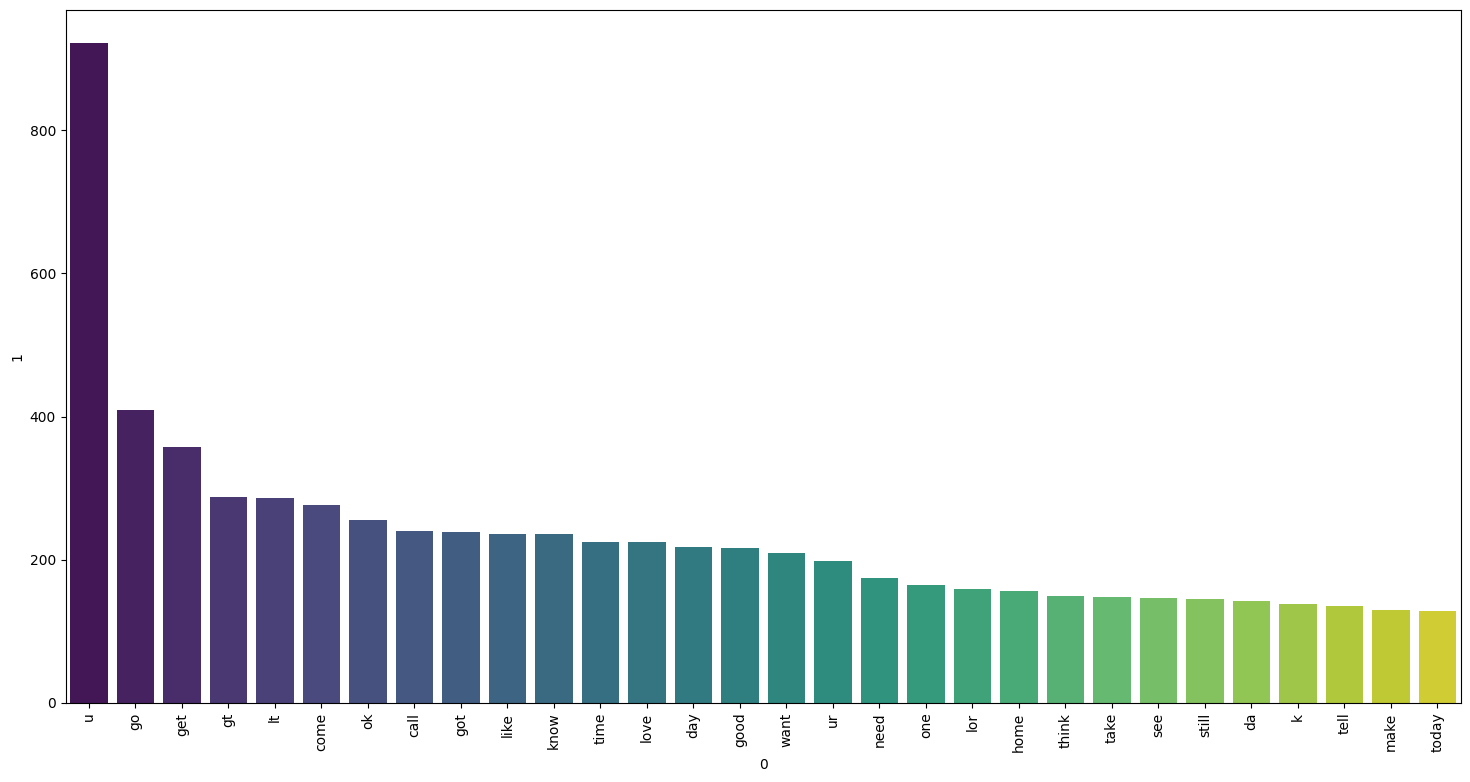

In [51]:
from collections import Counter

plt.figure(figsize=(18,9))
sns.barplot(x = pd.DataFrame(Counter(Ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(Ham_corpus).most_common(30))[1],hue= pd.DataFrame(Counter(Ham_corpus).most_common(30))[0],palette="viridis")
plt.xticks(rotation = "vertical")
plt.show()

## Model Building

In [52]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tdf = TfidfVectorizer()

In [53]:
X = tdf.fit_transform(df["Transformed_text"]).toarray()

In [54]:
y = df['Target'].values

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size= 0.2 , random_state= 2)

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test,y_pred))

0.8752417794970987
[[792 104]
 [ 25 113]]
0.5207373271889401


In [60]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test,y_pred2))

0.9632495164410058
[[896   0]
 [ 38 100]]
1.0


In [61]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test,y_pred3))

0.9758220502901354
[[890   6]
 [ 19 119]]
0.952


**I choose TDF to convert charaters to numeric**<br>
**The precision of MultinomialNB this is very good and accuracy is good. As the Data is imbalance we choose here precision over accuracy**

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [63]:
lrc = LogisticRegression(solver='liblinear',penalty="l1")
svc = SVC(kernel="sigmoid",gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50 , random_state= 2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50 , random_state= 2)
gdbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators = 50 , random_state = 2)

In [64]:
clfs = {
    "LR" : lrc,
    "SVC" : svc,
    "NB" : mnb,
    "DT" : dtc,
    "KN" : knc,
    "RF" : rfc,
    "ADaBoost" : abc,
    "ETC" : etc,
    "GBDT" : gdbc,
    "Xgb" : xgb
}

In [65]:
def train_model(clfs,X_train,y_train,X_test,y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred)
    return acc , pre 

In [66]:
accuracy_scores = []
precision_scores = []

for name, cls in clfs.items():
 
    current_accuracy, current_precision = train_model(cls, X_train, y_train, X_test, y_test)
    
    print(f"Classifier: {name}")
    print(f"Accuracy  : {current_accuracy:.4f}")
    print(f"Precision : {current_precision:.4f}")
    print("-" * 40) 
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Classifier: LR
Accuracy  : 0.9516
Precision : 0.9400
----------------------------------------
Classifier: SVC
Accuracy  : 0.9749
Precision : 0.9667
----------------------------------------
Classifier: NB
Accuracy  : 0.9632
Precision : 1.0000
----------------------------------------
Classifier: DT
Accuracy  : 0.9342
Precision : 0.8241
----------------------------------------
Classifier: KN
Accuracy  : 0.9062
Precision : 1.0000
----------------------------------------
Classifier: RF
Accuracy  : 0.9729
Precision : 0.9911
----------------------------------------
Classifier: ADaBoost
Accuracy  : 0.9236
Precision : 0.8315
----------------------------------------
Classifier: ETC
Accuracy  : 0.9758
Precision : 0.9913
----------------------------------------
Classifier: GBDT
Accuracy  : 0.9458
Precision : 0.9184
----------------------------------------
Classifier: Xgb
Accuracy  : 0.9758
Precision : 0.9593
----------------------------------------


In [67]:
performance_df1 = pd.DataFrame({"Algorithum" : clfs.keys(), "Accuracy" : accuracy_scores ,"Precision" : precision_scores })

In [68]:
performance_df1

,Algorithum,Accuracy,Precision
0,LR,0.951644,0.940000
1,SVC,0.974855,0.966667
2,NB,0.963250,1.000000
3,DT,0.934236,0.824074
4,KN,0.906190,1.000000
5,RF,0.972921,0.991071
6,ADaBoost,0.923598,0.831461
7,ETC,0.975822,0.991304
8,GBDT,0.945841,0.918367
9,Xgb,0.975822,0.959350


## Model Improvenment

In [86]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tdf = TfidfVectorizer(max_features=3000)

In [87]:
X = tdf.fit_transform(df["Transformed_text"]).toarray()

In [88]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [72]:
y = df['Target'].values

In [73]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size= 0.2 , random_state= 2)

In [76]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [77]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test,y_pred))

0.8752417794970987
[[792 104]
 [ 25 113]]
0.5207373271889401


In [89]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [80]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[894   2]
 [ 15 123]]
0.984


In [81]:
accuracy_scores = []
precision_scores = []

for name, cls in clfs.items():
 
    current_accuracy, current_precision = train_model(cls, X_train, y_train, X_test, y_test)
    
    print(f"Classifier: {name}")
    print(f"Accuracy  : {current_accuracy:.4f}")
    print(f"Precision : {current_precision:.4f}")
    print("-" * 40) 
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



Classifier: LR
Accuracy  : 0.9565
Precision : 0.9515
----------------------------------------
Classifier: SVC
Accuracy  : 0.9758
Precision : 0.9669
----------------------------------------
Classifier: NB
Accuracy  : 0.9739
Precision : 1.0000
----------------------------------------
Classifier: DT
Accuracy  : 0.9362
Precision : 0.8333
----------------------------------------
Classifier: KN
Accuracy  : 0.9091
Precision : 1.0000
----------------------------------------
Classifier: RF
Accuracy  : 0.9758
Precision : 0.9829
----------------------------------------
Classifier: ADaBoost
Accuracy  : 0.9255
Precision : 0.8427
----------------------------------------
Classifier: ETC
Accuracy  : 0.9787
Precision : 0.9754
----------------------------------------
Classifier: GBDT
Accuracy  : 0.9487
Precision : 0.9293
----------------------------------------
Classifier: Xgb
Accuracy  : 0.9720
Precision : 0.9504
----------------------------------------


In [82]:
performance_df = pd.DataFrame({"Algorithum" : clfs.keys(), "Accuracy_max_ft_300" : accuracy_scores ,"Precision_max_ft_300" : precision_scores })

In [83]:
performance_df

,Algorithum,Accuracy_max_ft_300,Precision_max_ft_300
0,LR,0.956480,0.951456
1,SVC,0.975822,0.966942
2,NB,0.973888,1.000000
3,DT,0.936170,0.833333
4,KN,0.909091,1.000000
5,RF,0.975822,0.982906
6,ADaBoost,0.925532,0.842697
7,ETC,0.978723,0.975410
8,GBDT,0.948743,0.929293
9,Xgb,0.971954,0.950413


In [84]:
performance_df1.merge(performance_df, on="Algorithum")

,Algorithum,Accuracy,Precision,Accuracy_max_ft_300,Precision_max_ft_300
0,LR,0.951644,0.940000,0.956480,0.951456
1,SVC,0.974855,0.966667,0.975822,0.966942
2,NB,0.963250,1.000000,0.973888,1.000000
3,DT,0.934236,0.824074,0.936170,0.833333
4,KN,0.906190,1.000000,0.909091,1.000000
5,RF,0.972921,0.991071,0.975822,0.982906
6,ADaBoost,0.923598,0.831461,0.925532,0.842697
7,ETC,0.975822,0.991304,0.978723,0.975410
8,GBDT,0.945841,0.918367,0.948743,0.929293
9,Xgb,0.975822,0.959350,0.971954,0.950413


In [90]:
import pickle
pickle.dump(tdf,open("vectorizer.pkl",'wb'))
pickle.dump(mnb,open("model.pkl","wb"))